In [50]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (18, 5)
plt.rcParams['font.family'] = 'sans-serif'

We saw earlier that pandas is really good at dealing with dates. It is also amazing with strings! We're going to go back to our weather data from Chapter 5, here.

In [51]:
df = pd.read_csv('../data/weather_2012.csv', encoding='utf-8', sep=',', parse_dates=['Date/Time'], index_col='Date/Time')
df.head()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# 6.1 String operations

You'll see that the 'Weather' column has a text description of the weather that was going on each hour. We'll assume it's snowing if the text description contains "Snow". 

pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great [examples](http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods) in the documentation.

Get a series telling if it has snowed or not using str.contains from series object

In [52]:
is_snowing = df['Weather'].str.contains('snow', case=False, regex=False)
is_snowing.head()
#pat c'est le str (le mot chercher dans notre exemple c'est 'Snow')
#case permet de regler la sensibilité a la casse. si True senssibilité à la casse.
#regex, si True suppose que le mot a chercher est une expression regulière, si False traite pat comme une chaine littérale

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

This gives us a binary vector, which is a bit hard to look at, so we'll plot it.

In [7]:
# Not super useful


In [59]:
# More useful!
is_snowing.value_counts()

False    8201
True      583
Name: Weather, dtype: int64

# 6.2 Use resampling to find the snowiest month

If we wanted the median temperature each month, we could use the `resample()`

In [53]:
df2=df.resample(rule='M').mean()
df2.head()
#df2.describe()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
Date/Time,,,,,,
2012-01-31,-7.371505,-12.294758,68.383065,18.108871,22.100269,101.005349
2012-02-29,-4.225000,-9.221695,68.956897,14.837644,25.182184,101.142414
2012-03-31,3.121237,-3.488575,64.862903,14.514785,26.177957,101.335255
2012-04-30,7.009306,-1.934583,56.150000,17.369444,31.777083,100.716833
2012-05-31,16.237769,8.080780,61.760753,12.846774,29.418548,101.057164


Unsurprisingly, July and August are the warmest.

So we can think of snowiness as being a bunch of 1s and 0s instead of `True`s and `False`s:

In [54]:
#la fonction permet de recoder par 1 s'il à neigé et par 0 s'il n'a pas neigé 
def recodage_weather(x): 
    if 'Snow' in x:
        x = 1
    else:
        x = 0
    return x

In [55]:
# j'utilise la methode map() pour appliquer la fonction 'recodage_weather' a chaque élément de la colonnes Weather        
df1 = df['Weather'].map(recodage_weather)
df1

#je rajoute cette nouvelle colonne appellé 'SnowORnot' à mon DataFrame df
df['snowORnot'] = df1
df.head()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,snowORnot
Date/Time,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,0
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",0
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",0
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,0


and then use `resample` to find the percentage of time it was snowing each month and plot it

In [56]:
df3 = df.resample(rule = 'M').mean()
df3

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),snowORnot
Date/Time,,,,,,,
2012-01-31,-7.371505,-12.294758,68.383065,18.108871,22.100269,101.005349,0.240591
2012-02-29,-4.225000,-9.221695,68.956897,14.837644,25.182184,101.142414,0.162356
2012-03-31,3.121237,-3.488575,64.862903,14.514785,26.177957,101.335255,0.087366
2012-04-30,7.009306,-1.934583,56.150000,17.369444,31.777083,100.716833,0.015278
2012-05-31,16.237769,8.080780,61.760753,12.846774,29.418548,101.057164,0.000000
2012-06-30,20.134028,11.738056,60.643056,14.681944,32.104167,100.784222,0.000000
2012-07-31,22.790054,14.595430,62.017473,11.887097,33.655108,100.828333,0.000000
2012-08-31,22.279301,15.644758,67.943548,13.931452,30.192608,100.927097,0.000000
2012-09-30,16.484444,10.757917,71.165278,14.108333,30.603472,101.087903,0.000000


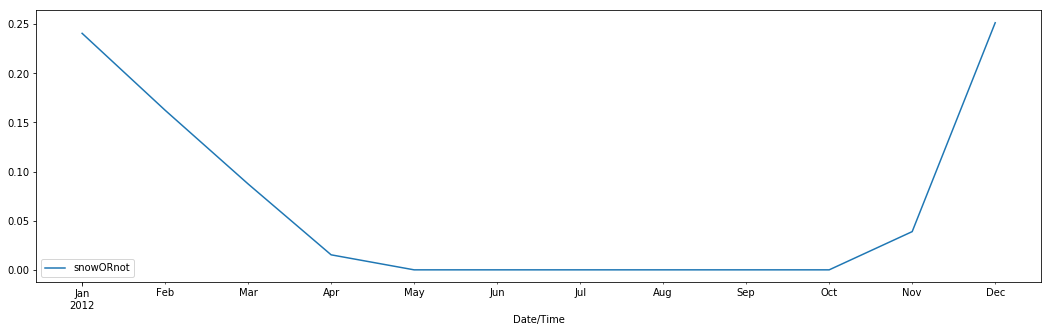

In [57]:
df3.plot(x = None, y = 'snowORnot')

So now we know! In 2012, December was the snowiest month. Also, this graph suggests something that I feel -- it starts snowing pretty abruptly in November, and then tapers off slowly and takes a long time to stop, with the last snow usually being in April or May.

# 6.3 Plotting temperature and snowiness stats together

We can also combine these two statistics (temperature, and snowiness) into one dataframe and plot them together:

In [58]:
temp = df['Temp (\xb0C)']
snow = df['snowORnot']
tempANDsnow= df[['Temp (\xb0C)', 'snowORnot']]
tempANDsnow.head()

,Temp (°C),snowORnot
Date/Time,,
2012-01-01 00:00:00,-1.8,0
2012-01-01 01:00:00,-1.8,0
2012-01-01 02:00:00,-1.8,0
2012-01-01 03:00:00,-1.5,0
2012-01-01 04:00:00,-1.5,0



We'll use `concat` again to combine the two statistics into a single dataframe named stats

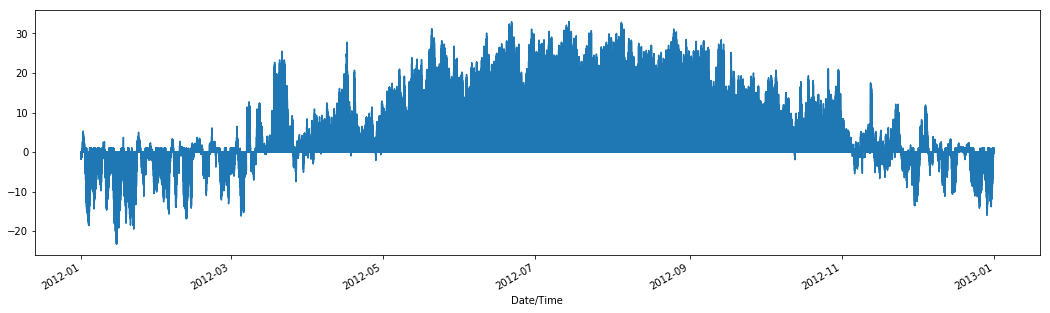

In [59]:
tempsnow = pd.concat([temp,snow], ignore_index = False)
tempsnow.plot()

Uh, that didn't work so well because the scale was wrong. We can do better by plotting them on two separate graphs:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DC7F4A8>,
      dtype=object)

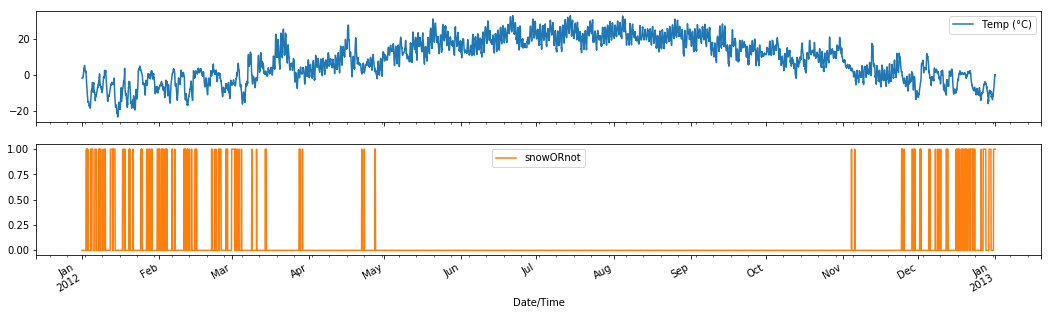

In [60]:
tempANDsnow.plot(subplots = True)

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  